In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the graphs as interactive.
%matplotlib inline

## Importing Dataset

In [8]:
accidents_2019 = pd.read_csv('../data/2019_accidents_persones_gu_bcn_.csv')
accidents_2018 = pd.read_csv('../data/2018_accidents_persones_gu_bcn_.csv')
accidents_2017 = pd.read_csv('../data/2017_accidents_persones_gu_bcn_.csv')
accidents_2016 = pd.read_csv('../data/2016_accidents_persones_gu_bcn_.csv')


In [9]:
accidents = pd.concat([accidents_2019, accidents_2017,accidents_2018,accidents_2016], axis = 0)

In [10]:
accidents.columns

Index(['Numero_Expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Num_postal', 'Num_postal.1',
       'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia',
       'NK_ Any', 'Mes_ any', 'Nom_mes', 'Dia_mes', 'Descripcio_torn',
       'Hora_dia', 'Descripcio_causa_vianant', 'Desc_Tipus_vehicle_implicat',
       'Descripcio_sexe', 'Edat', 'Descripcio_tipus_persona',
       'Descripcio_Lloc_atropellament_vianat',
       'Descripcio_Motiu_desplaçament_vianant',
       'Descripcio_Motiu_desplaçament_conductor', 'Descripcio_victimitzacio',
       'Coordenada_UTM_X', 'Coordenada_UTM_Y', 'Longitud', 'Latitud',
       'Numero_expedient', 'Nom_carrer', 'Num_postal ', 'Any',
       'Descripcio_situacio', 'Mes_any'],
      dtype='object')

In [11]:
accidents.head()

,Numero_Expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Num_postal,Num_postal.1,Descripcio_dia_setmana,Dia_setmana,...,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud,Numero_expedient,Nom_carrer,Num_postal,Any,Descripcio_situacio,Mes_any
0,2019S003731,5,Sarrià-Sant Gervasi,22,"Vallvidrera, el Tibidabo i les Planes",700059,Vallvidrera a les Planes / Vesc ...,0050 0050,Dimecres,Dc,...,424364.44,4586356.76,2.09364,41.4234,NaN,NaN,NaN,NaN,NaN,NaN
1,2019S007079,5,Sarrià-Sant Gervasi,22,"Vallvidrera, el Tibidabo i les Planes",700059,Vallvidrera a les Planes ...,520000,Divendres,Dv,...,424664.63,4585896.4,2.09728,41.4193,NaN,NaN,NaN,NaN,NaN,NaN
2,2019S000173,5,Sarrià-Sant Gervasi,22,"Vallvidrera, el Tibidabo i les Planes",107853,Robínia ...,0001 0001,Dimarts,Dm,...,424953.07,4586589.22,2.10065,41.4255,NaN,NaN,NaN,NaN,NaN,NaN
3,2019S001526,4,Les Corts,21,Pedralbes,701267,B-20 (Besòs) ...,460000,Dimarts,Dm,...,424991.14,4581760.18,2.1017,41.382,NaN,NaN,NaN,NaN,NaN,NaN
4,2019S005025,4,Les Corts,21,Pedralbes,701267,Dalt (Besòs) ...,480000,Dijous,Dj,...,425098.69,4581932.44,2.10297,41.3836,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping useless columns and NaN

In [12]:
accidents.isnull().sum()

Numero_Expedient                           36074
Codi_districte                                 0
Nom_districte                                  0
Codi_barri                                     0
Nom_barri                                      0
Codi_carrer                                    0
Num_postal                                 41351
Num_postal.1                               36074
Descripcio_dia_setmana                         0
Dia_setmana                                    0
Descripcio_tipus_dia                           0
NK_ Any                                    36074
Mes_ any                                   12072
Nom_mes                                        0
Dia_mes                                        0
Descripcio_torn                                0
Hora_dia                                       0
Descripcio_causa_vianant                       0
Desc_Tipus_vehicle_implicat                    0
Descripcio_sexe                                0
Edat                

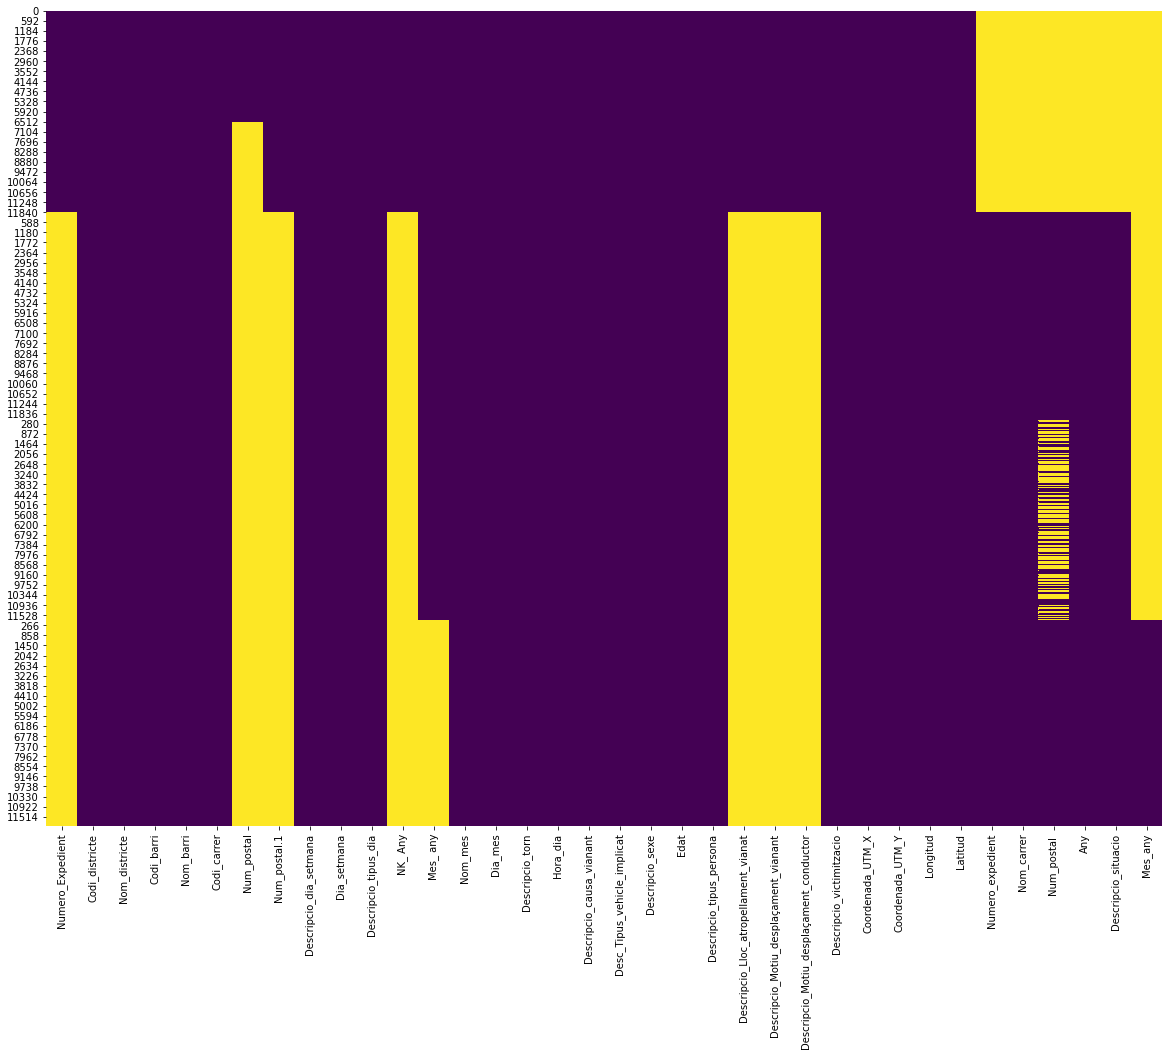

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(accidents.isnull(), cbar = False, cmap = 'viridis')

In [14]:
# In proportion of the dataset, the missing values are a logical explanation.
#1. Columns Numero_Expedient + 'Numero_expedient' need to be concated, they're splittes by 2019 year csv due to variable name 
#2. We only need the Expedient accident number as ID to concatenate in the future and the important featuresthat i will choose in the next cell

In [15]:
accidents = pd.DataFrame(data=accidents, columns=['Descripcio_victimitzacio','Descripcio_tipus_persona','Desc_Tipus_vehicle_implicat','Descripcio_sexe','Edat','Numero_Expedient','Numero_expedient'])
#Please, come back to run

In [16]:
accidents['Numero_expedient'] = accidents['Numero_expedient'].fillna(accidents.Numero_Expedient) #CSV there's a column year as NK_Any instead of Any like the other CSVs, then we fill NAN 'Any' column like 2019 (the difference)

In [17]:
accidents.drop(columns = 'Numero_Expedient',axis=1,inplace=True) #we eliminate this column because we have all distirbuted in column 'Any' as we did in the before cells. Codi_barri is a column irrelevant for us.

In [18]:
accidents.Descripcio_victimitzacio.value_counts()

Ferit lleu: Hospitalització fins a 24h                      21206
Ferit lleu                                                  14814
Ferit lleu: Amb assistència sanitària en lloc d'accident     9512
Ferit lleu: Rebutja assistència sanitària                    1433
Ferit greu: hospitalització superior a 24h                    633
Ferit greu                                                    237
Mort (dins 24h posteriors accident)                            52
Mort                                                           31
Name: Descripcio_victimitzacio, dtype: int64

In [19]:
accidents.dtypes #Edat must be int or float

Descripcio_victimitzacio       object
Descripcio_tipus_persona       object
Desc_Tipus_vehicle_implicat    object
Descripcio_sexe                object
Edat                           object
Numero_expedient               object
dtype: object

In [21]:
accidents.drop(accidents.loc[accidents['Edat']=='Desconegut'].index, inplace=True)

In [31]:
accidents['Edat'].unique()

array(['30', '47', '55', '40', '51', '20', '62', '23', '48', '38', '21',
       '56', '43', '42', '53', '37', '50', '28', '22', '44', '34', '36',
       '52', '64', '16', '27', '57', '29', '41', '59', '33', '39', '46',
       '25', '54', '15', '31', '71', '17', '18', '32', '81', '19', '35',
       '49', '73', '45', '76', '26', '24', '60', '67', '66', '69', '65',
       '83', '61', '58', '95', '68', '75', '70', '63', '72', '79', '84',
       '82', '80', '74', '12', '78', '86', '13', '87', '77', '85', '2',
       '14', '4', '6', '8', '11', '3', '88', '10', '5', '7', '89', '1',
       '0', '9', '90', '96', '94', '93', '91', '97', '92', '119', '98',
       '117'], dtype=object)

In [32]:
accidents.to_csv('../data/accidents_bcn_gender_cleaned.csv', index=False)